In [250]:
import pandas as pd
import geopandas as gpd
import requests

# Data Preprocessing

### Read data

In [251]:
token = "vAtl2Z7zE587vSL1K0jPGUqgw"

Download zipcode data

In [252]:
raw_zipcode = gpd.read_file("nyc_zipcodes.shp")
raw_zipcode

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17..."
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ..."
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20..."
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21..."


Download zillow data

In [253]:
raw_zillow = pd.read_csv("zillow_rent_data.csv")
raw_zillow.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2015-01-31,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,1606.206406,...,1994.653463,2027.438438,2042.237444,2049.325559,2016.531345,2023.438976,2031.558202,2046.144009,2053.486247,2055.771355
1,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,1257.814660,...,1749.697900,1738.217986,1747.305840,1758.407295,1758.891075,1762.980879,1771.751591,1779.338402,1795.384582,1799.631140
2,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,NaN,...,1701.217520,1706.900064,1706.067787,1723.722320,1735.484670,1752.132904,1756.990323,1754.429516,1757.602011,1755.031490
3,93144,6,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,NaN,...,1419.480272,1458.063897,1471.726681,1466.734658,1456.175660,1462.478506,1466.267391,1490.237063,1488.180414,1494.366097
4,62093,7,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,NaN,...,2935.808220,2895.699421,2873.209025,2881.906361,2913.546218,2963.964134,3005.735342,3034.413822,3064.476503,3079.585783


Download 311 data with API

In [254]:
# API endpoint URL
url_311 = 'https://data.cityofnewyork.us/resource/erm2-nwe9.json?$limit=100000'

# Set up the headers with the API token
headers = {'X-App-Token': token}

# Make the API request
response = requests.get(url_311, headers=headers)
data = response.json()

# Print the data
raw_311= pd.DataFrame(data)
raw_311.head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,...,vehicle_type,bridge_highway_name,bridge_highway_direction,bridge_highway_segment,closed_date,facility_type,taxi_pick_up_location,taxi_company_borough,due_date,road_ramp
0,59653318,2023-12-06T12:00:00.000,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,11357,147-37 23 AVENUE,23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59650477,2023-12-06T12:00:00.000,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,11423,183-14 JAMAICA AVENUE,JAMAICA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,59646364,2023-12-06T01:21:27.000,NYPD,New York City Police Department,Noise - Residential,Loud Television,Residential Building/House,10458,315 EAST 187 STREET,EAST 187 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,59651722,2023-12-06T01:20:45.000,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11357,23-04 149 STREET,149 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,59644923,2023-12-06T01:20:17.000,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,11214,8641 25 AVENUE,25 AVENUE,...,Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Download tree data with API

In [255]:
# API endpoint URL
url_tree = 'https://data.cityofnewyork.us/resource/5rq2-4hqu.json'

# Set up the headers with the API token
headers = {'X-App-Token': token}

# Make the API request
response = requests.get(url_tree, headers=headers)
data = response.json()

# Print the data
raw_tree = pd.DataFrame(data)
raw_tree.head()

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,...,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
0,08/27/2015,180683,348711,"{'type': 'Point', 'coordinates': [-73.84421521...",3,0,OnCurb,Alive,Fair,Acer rubrum,...,28,16,QN17,Forest Hills,4073900,New York,40.72309177,-73.84421522,1027431.14821,202756.768749
1,09/03/2015,200540,315986,"{'type': 'Point', 'coordinates': [-73.81867945...",21,0,OnCurb,Alive,Fair,Quercus palustris,...,27,11,QN49,Whitestone,4097300,New York,40.79411067,-73.81867946,1034455.70109,228644.837379
2,09/05/2015,204026,218365,"{'type': 'Point', 'coordinates': [-73.93660770...",3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,50,18,BK90,East Williamsburg,3044900,New York,40.71758074,-73.9366077,1001822.83131,200716.891267
3,09/05/2015,204337,217969,"{'type': 'Point', 'coordinates': [-73.93445615...",10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,53,18,BK90,East Williamsburg,3044900,New York,40.71353749,-73.93445616,1002420.35833,199244.253136
4,08/30/2015,189565,223043,"{'type': 'Point', 'coordinates': [-73.97597938...",21,0,OnCurb,Alive,Good,Tilia americana,...,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.66677776,-73.97597938,990913.775046,182202.425999


### Removing unnecessary columns

In [256]:
df_zip = raw_zipcode.copy()
columns_to_drop = raw_zipcode.columns[[1, 3, 4, 5, 7, 8, 9, 10, 11]]
df_zipcode_1 = df_zip.drop(columns=columns_to_drop)
df_zipcode_1.head()

,ZIPCODE,PO_NAME,COUNTY,geometry
0,11436,Jamaica,Queens,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,Brooklyn,Kings,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,Brooklyn,Kings,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,Brooklyn,Kings,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,Brooklyn,Kings,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [257]:
df_z = raw_zillow.copy()
df_zillow_1 = pd.concat([df_z.iloc[:, [2, 6]], df_z.iloc[:, 9:]], axis=1)
df_zillow_1.head()

,RegionName,City,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,77494,Katy,1606.206406,1612.779844,1622.201575,1630.392427,1632.411500,1636.206864,1644.894632,1643.390762,...,1994.653463,2027.438438,2042.237444,2049.325559,2016.531345,2023.438976,2031.558202,2046.144009,2053.486247,2055.771355
1,77449,Katy,1257.814660,1255.268025,1262.170452,1274.955754,1285.526052,1295.665673,1296.650395,1300.868081,...,1749.697900,1738.217986,1747.305840,1758.407295,1758.891075,1762.980879,1771.751591,1779.338402,1795.384582,1799.631140
2,77084,Houston,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1701.217520,1706.900064,1706.067787,1723.722320,1735.484670,1752.132904,1756.990323,1754.429516,1757.602011,1755.031490
3,79936,El Paso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1419.480272,1458.063897,1471.726681,1466.734658,1456.175660,1462.478506,1466.267391,1490.237063,1488.180414,1494.366097
4,11385,New York,NaN,2087.527084,NaN,2149.924252,2166.263698,2148.992886,2190.098591,2264.966715,...,2935.808220,2895.699421,2873.209025,2881.906361,2913.546218,2963.964134,3005.735342,3034.413822,3064.476503,3079.585783


In [258]:
df_3 = raw_311.copy()
df_311_1 = df_3.loc[:, ["created_date", "complaint_type", "incident_zip", "latitude", "longitude"]]
df_311_1.head()

,created_date,complaint_type,incident_zip,latitude,longitude
0,2023-12-06T12:00:00.000,Derelict Vehicles,11357,40.77822249980856,-73.81908632292274
1,2023-12-06T12:00:00.000,Derelict Vehicles,11423,40.708928673178804,-73.77700460468061
2,2023-12-06T01:21:27.000,Noise - Residential,10458,40.85987723033569,-73.8963182880383
3,2023-12-06T01:20:45.000,Illegal Parking,11357,40.778044240391786,-73.81744033412902
4,2023-12-06T01:20:17.000,Illegal Parking,11214,40.59708285074158,-73.98805583712608


In [259]:
df_t = raw_tree.copy()
df_tree_1 = df_t.loc[:, ["zipcode", "tree_id", "latitude", "longitude", "x_sp", "y_sp", "status", "health", "spc_common"]]
df_tree_1.head()

,zipcode,tree_id,latitude,longitude,x_sp,y_sp,status,health,spc_common
0,11375,180683,40.72309177,-73.84421522,1027431.14821,202756.768749,Alive,Fair,red maple
1,11357,200540,40.79411067,-73.81867946,1034455.70109,228644.837379,Alive,Fair,pin oak
2,11211,204026,40.71758074,-73.9366077,1001822.83131,200716.891267,Alive,Good,honeylocust
3,11211,204337,40.71353749,-73.93445616,1002420.35833,199244.253136,Alive,Good,honeylocust
4,11215,189565,40.66677776,-73.97597938,990913.775046,182202.425999,Alive,Good,American linden


### Remove invalid data points 

Drop duplication

In [260]:
df_zipcode_2 = df_zipcode_1.drop_duplicates().reset_index(drop=True)
df_zipcode_2

,ZIPCODE,PO_NAME,COUNTY,geometry
0,11436,Jamaica,Queens,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,Brooklyn,Kings,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,Brooklyn,Kings,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,Brooklyn,Kings,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,Brooklyn,Kings,"POLYGON ((991997.113 176307.496, 992042.798 17..."
...,...,...,...,...
257,10310,Staten Island,Richmond,"POLYGON ((950767.507 172848.969, 950787.510 17..."
258,11693,Far Rockaway,Kings,"POLYGON ((1028453.995 167153.410, 1027813.010 ..."
259,11249,Brooklyn,Kings,"POLYGON ((995877.318 203206.075, 995968.511 20..."
260,10162,New York,New York,"POLYGON ((997731.761 219560.922, 997641.948 21..."


Drop the rows in df_zillow outsied NYC

In [261]:
index = df_zillow_1[df_zillow_1['City'] != "New York"].index
df_zillow_2 = df_zillow_1.drop(index).reset_index(drop=True)
df_zillow_2 = df_zillow_2.drop(["City"], axis=1)
df_zillow_2.head()

,RegionName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,11385,NaN,2087.527084,NaN,2149.924252,2166.263698,2148.992886,2190.098591,2264.966715,2297.900917,...,2935.808220,2895.699421,2873.209025,2881.906361,2913.546218,2963.964134,3005.735342,3034.413822,3064.476503,3079.585783
1,11208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2508.670432,2588.030194,2613.790654,2585.561351,2633.200754,2672.038493,2806.918757,2765.224364,2737.547470,2728.733333
2,11236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2285.460026,2362.500000
3,10467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2145.642295,2155.617718,2172.346611,2160.962748,2110.533203,2180.323655,2276.372290,2334.204728,2353.686402,2423.888889
4,11373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2199.459063,2255.604528,2262.101623,2271.514956,2250.182334,2231.959479,2257.413993,2247.592851,2302.557354,2292.994444


Change the format of rent dataframe

In [262]:
df_rent_1 = pd.DataFrame(columns=["zipcode", "date", "rent"])
temp_data = []
for index, row in df_zillow_2.iterrows():
    for i in range(len(row)-1):
        temp_data.append({"zipcode": str(int(row[0])), "date": df_zillow_2.columns[i+1], "rent": row[i+1]})
df_rent_1 = pd.concat([df_rent_1, pd.DataFrame(temp_data)], ignore_index=True)
df_rent_1.dropna(subset=['rent'], inplace=True)
df_rent_1 = df_rent_1.reset_index(drop=True)

### Normalize column names & column types where needed

Normalize the name of zipcode colunms

In [263]:
df_311_1.rename(columns={'incident_zip': 'zipcode', 'created_date': 'date'}, inplace=True)
df_311_1.head()

,date,complaint_type,zipcode,latitude,longitude
0,2023-12-06T12:00:00.000,Derelict Vehicles,11357,40.77822249980856,-73.81908632292274
1,2023-12-06T12:00:00.000,Derelict Vehicles,11423,40.708928673178804,-73.77700460468061
2,2023-12-06T01:21:27.000,Noise - Residential,10458,40.85987723033569,-73.8963182880383
3,2023-12-06T01:20:45.000,Illegal Parking,11357,40.778044240391786,-73.81744033412902
4,2023-12-06T01:20:17.000,Illegal Parking,11214,40.59708285074158,-73.98805583712608


In [264]:
df_zipcode_2.rename(columns={'ZIPCODE': 'zipcode'}, inplace=True)
df_zipcode_2.head()

,zipcode,PO_NAME,COUNTY,geometry
0,11436,Jamaica,Queens,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,Brooklyn,Kings,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,Brooklyn,Kings,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,Brooklyn,Kings,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,Brooklyn,Kings,"POLYGON ((991997.113 176307.496, 992042.798 17..."


Transform date columns from strings to datetime Python objects


In [265]:
df_311_1['date'] = pd.to_datetime(df_311_1['date'])
print(df_311_1.dtypes) 

date              datetime64[ns]
complaint_type            object
zipcode                   object
latitude                  object
longitude                 object
dtype: object


In [266]:
df_rent_1['date'] = pd.to_datetime(df_rent_1['date'])

In [267]:
df_tree_1 = df_tree_1.astype({'latitude': float, 'longitude': float})
df_311_1 = df_311_1.astype({'latitude': float, 'longitude': float})

### Normalize the Spatial Reference Identifiers (SRID) of any geometry.

In [268]:
from shapely.geometry import Point

In [269]:
print(df_zipcode_2.crs)

EPSG:2263


In [270]:
geometry = gpd.points_from_xy(df_tree_1.x_sp, df_tree_1.y_sp)
df_tree_2 = gpd.GeoDataFrame(df_tree_1, geometry=geometry)
df_tree_2.crs = "EPSG:2263"
df_tree_2.dtypes

zipcode         object
tree_id         object
latitude       float64
longitude      float64
x_sp            object
y_sp            object
status          object
health          object
spc_common      object
geometry      geometry
dtype: object

In [271]:
geometry = gpd.points_from_xy(df_311_1.longitude, df_311_1.latitude)
df_311_2 = gpd.GeoDataFrame(df_311_1, geometry=geometry)
df_311_2.crs = "EPSG:2263"
df_311_2.dtypes

date              datetime64[ns]
complaint_type            object
zipcode                   object
latitude                 float64
longitude                float64
geometry                geometry
dtype: object

# Storing Data

## Create database

In [272]:
!createdb group36project

createdb: error: database creation failed: ERROR:  database "group36project" already exists


In [273]:
!psql --dbname group36project -c 'CREATE EXTENSION postgis;'

ERROR:  extension "postgis" already exists


## Create a schema.sql file that defines each table’s schema.

In [274]:
from sqlalchemy import create_engine
from geoalchemy2 import Geometry, WKTElement
engine = create_engine('postgresql:///group36project')
conn = engine.connect()
conn.execute("CREATE EXTENSION IF NOT EXISTS postgis;")

In [275]:
# Get the data types of each column
dtypes = df_zipcode_2.dtypes

# Create a mapping from pandas data types to SQL data types
type_mapping = {
    'int64': 'INTEGER',
    'float64': 'REAL',
    'datetime64[ns]': 'TIMESTAMP',
    'object': 'TEXT',
    'geometry':'geometry(Geometry,2263)' 
}

# Generate SQL definitions for each column
definitions = []
for column, dtype in dtypes.iteritems():
    sql_type = type_mapping[str(dtype)]
    definitions.append(f'    {column} {sql_type}')

# Generate and print the full CREATE TABLE statement
table_name = 'df_zipcode'
sql_zipcode = f'CREATE TABLE IF NOT EXISTS {table_name} (\n    id INTEGER PRIMARY KEY'+',\n'+ ',\n'.join(definitions) + '\n);'

/var/folders/ng/8_030tqj3v70xysfp6xpjl_40000gn/T/ipykernel_5034/2376348724.py:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, dtype in dtypes.iteritems():


In [276]:
# Get the data types of each column
dtypes = df_311_2.dtypes

# Create a mapping from pandas data types to SQL data types
type_mapping = {
    'int64': 'INTEGER',
    'float64': 'REAL',
    'datetime64[ns]': 'TIMESTAMP',
    'object': 'TEXT',
    'geometry':'geometry(Geometry,2263)' 
}

# Generate SQL definitions for each column
definitions = []
for column, dtype in dtypes.iteritems():
    sql_type = type_mapping[str(dtype)]
    definitions.append(f'    {column} {sql_type}')

# Generate and print the full CREATE TABLE statement
table_name = 'df_311'
sql_311 = f'CREATE TABLE IF NOT EXISTS {table_name} (\n    id INTEGER PRIMARY KEY'+',\n'+ ',\n'.join(definitions) + '\n);'

/var/folders/ng/8_030tqj3v70xysfp6xpjl_40000gn/T/ipykernel_5034/2342110588.py:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, dtype in dtypes.iteritems():


In [277]:
# Get the data types of each column
dtypes = df_tree_2.dtypes

# Create a mapping from pandas data types to SQL data types
type_mapping = {
    'int64': 'INTEGER',
    'float64': 'REAL',
    'datetime64[ns]': 'TIMESTAMP',
    'object': 'TEXT',
    'geometry':'geometry(Geometry,2263)' 
}

# Generate SQL definitions for each column
definitions = []
for column, dtype in dtypes.iteritems():
    sql_type = type_mapping[str(dtype)]
    definitions.append(f'    {column} {sql_type}')

# Generate and print the full CREATE TABLE statement
table_name = 'df_tree'
sql_tree = f'CREATE TABLE IF NOT EXISTS {table_name} (\n    id INTEGER PRIMARY KEY'+',\n'+ ',\n'.join(definitions) + '\n);'

/var/folders/ng/8_030tqj3v70xysfp6xpjl_40000gn/T/ipykernel_5034/4126635245.py:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, dtype in dtypes.iteritems():


In [278]:
# Get the data types of each column
dtypes = df_rent_1.dtypes

# Create a mapping from pandas data types to SQL data types
type_mapping = {
    'int64': 'INTEGER',
    'float64': 'REAL',
    'datetime64[ns]': 'TIMESTAMP',
    'object': 'TEXT',
    'geometry':'geometry(Geometry,2263)' 
}

# Generate SQL definitions for each column
definitions = []
for column, dtype in dtypes.iteritems():
    sql_type = type_mapping[str(dtype)]
    definitions.append(f'    {column} {sql_type}')

# Generate and print the full CREATE TABLE statement
table_name = 'df_zillow'
sql_zillow = f'CREATE TABLE IF NOT EXISTS {table_name} (\n    id INTEGER PRIMARY KEY'+',\n'+ ',\n'.join(definitions) + '\n);'

/var/folders/ng/8_030tqj3v70xysfp6xpjl_40000gn/T/ipykernel_5034/808278855.py:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, dtype in dtypes.iteritems():


In [279]:
# Write to 'schema.sql' file
with open('schema.sql', 'w') as f:
    f.write(sql_zipcode)
    f.write(sql_311)
    f.write(sql_tree)
    f.write(sql_zillow)

In [280]:
with open('schema.sql') as f:
    with engine.connect() as connection:
        connection.execute(f.read())

## Add data to database

In [281]:
tablename_to_dataframe = {
    "complaints": df_311_2,
    "trees": df_tree_2,
    "zipcodes": df_zipcode_2,
}

In [282]:
def write_dataframes_to_table(tablename_to_dataframe, db_url):
    # Write each dataframe to its table
    for tablename, df in tablename_to_dataframe.items():
        if 'geometry' in df.columns:
            # Check if the 'geometry' column is already of type 'WKTElement'
            if not isinstance(df['geometry'].iloc[0], WKTElement):
                df['geometry'] = df['geometry'].apply(lambda x: WKTElement(x.wkt, srid=2263))

        df.to_sql(tablename, engine, if_exists='replace', index=False, dtype={'geometry': Geometry('GEOMETRY', srid= 2263)})
        
# Call the function to write data to tables
write_dataframes_to_table(tablename_to_dataframe, 'postgresql:///group36project')

/var/folders/ng/8_030tqj3v70xysfp6xpjl_40000gn/T/ipykernel_5034/4148966488.py:7: UserWarning: Geometry column does not contain geometry.
  df['geometry'] = df['geometry'].apply(lambda x: WKTElement(x.wkt, srid=2263))
/var/folders/ng/8_030tqj3v70xysfp6xpjl_40000gn/T/ipykernel_5034/4148966488.py:7: UserWarning: Geometry column does not contain geometry.
  df['geometry'] = df['geometry'].apply(lambda x: WKTElement(x.wkt, srid=2263))
/var/folders/ng/8_030tqj3v70xysfp6xpjl_40000gn/T/ipykernel_5034/4148966488.py:7: UserWarning: Geometry column does not contain geometry.
  df['geometry'] = df['geometry'].apply(lambda x: WKTElement(x.wkt, srid=2263))


In [283]:
df_rent_1.to_sql("rent", engine, if_exists='replace', index=True, index_label='id')

39

In [284]:
query = """
SELECT f_geometry_column, coord_dimension, srid, type 
FROM geometry_columns 
WHERE f_table_name = 'trees'
"""
df = pd.read_sql_query(query, engine)
print(df)

  f_geometry_column  coord_dimension  srid      type
0          geometry                2  2263  GEOMETRY


# Understanding Data

In [285]:
from sqlalchemy import text
def write_query_to_file(query, outfile):
    with open(outfile, 'w') as f:
        f.write(query)

### Query 1

In [286]:
QUERY_1_FILENAME = "Query 1"

In [287]:
# Define your SQL query
QUERY_1 = """
SELECT zipcode, COUNT(*) AS complaints_count
FROM complaints
WHERE date BETWEEN '2022-10-01' AND '2023-09-30'
GROUP BY zipcode
ORDER BY complaints_count DESC;
"""

# Execute the query and fetch the results into a pandas DataFrame
df = pd.read_sql_query(QUERY_1, engine)

# Display the DataFrame
print(df)

Empty DataFrame
Columns: [zipcode, complaints_count]
Index: []


In [288]:
with engine.connect() as conn:
    result = conn.execute(text(QUERY_1))
    for row in result:
        print(row)

In [289]:
write_query_to_file(QUERY_1, QUERY_1_FILENAME)

### Query 2

In [290]:
QUERY_2_FILENAME = "Query 2"

In [291]:
# Define your SQL query
QUERY_2 = """
SELECT zipcode, COUNT(*) AS trees_count
FROM trees
GROUP BY zipcode
ORDER BY trees_count DESC
LIMIT 10;
"""

# Execute the query and fetch the results into a pandas DataFrame
df = pd.read_sql_query(QUERY_2, engine)

# Display the DataFrame
print(df)

  zipcode  trees_count
0   11375           38
1   11215           35
2   11105           35
3   10023           33
4   10457           31
5   11205           30
6   11226           29
7   10306           28
8   11230           24
9   10458           22


In [292]:
with engine.connect() as conn:
    result = conn.execute(text(QUERY_2))
    for row in result:
        print(row)

('11375', 38)
('11215', 35)
('11105', 35)
('10023', 33)
('10457', 31)
('11205', 30)
('11226', 29)
('10306', 28)
('11230', 24)
('10458', 22)


In [293]:
write_query_to_file(QUERY_2, QUERY_2_FILENAME)

### Query3

In [294]:
QUERY_3_FILENAME = "Query 3"

In [295]:
QUERY_3 = """
SELECT trees_count.zipcode, CAST(ROUND(CAST(rent.rent AS numeric), 2) AS DECIMAL(10,2)) AS average_rent
FROM (
    SELECT zipcode, COUNT(*) AS trees_count
    FROM trees
    GROUP BY zipcode
    ORDER BY trees_count DESC
    LIMIT 10
) AS trees_count
JOIN rent ON trees_count.zipcode = rent.zipcode
WHERE rent.date = '2023-08-31'
ORDER BY trees_count.trees_count DESC;
"""

df = pd.read_sql_query(QUERY_3, engine)

# 将 average_rent 列转换为带有逗号的格式
df['average_rent'] = df['average_rent'].apply(lambda x: "{:,.2f}".format(x))

print(df)

  zipcode average_rent
0   11375     2,743.40
1   11105     2,852.73
2   11215     3,575.65
3   10023     4,370.07
4   10457     2,183.97
5   11205     3,497.47
6   11226     2,785.32
7   10306     2,331.54
8   11230     2,657.04
9   10458     1,991.63


In [296]:
with engine.connect() as conn:
    result = conn.execute(text(QUERY_3))
    for row in result:
        print(row)

('11375', Decimal('2743.40'))
('11105', Decimal('2852.73'))
('11215', Decimal('3575.65'))
('10023', Decimal('4370.07'))
('10457', Decimal('2183.97'))
('11205', Decimal('3497.47'))
('11226', Decimal('2785.32'))
('10306', Decimal('2331.54'))
('11230', Decimal('2657.04'))
('10458', Decimal('1991.63'))


In [297]:
write_query_to_file(QUERY_3, QUERY_3_FILENAME)

### Query4

In [298]:
QUERY_4_FILENAME = "Query 4"

In [299]:
QUERY_4 = """
(SELECT h_rent.zipcode, h_rent.rent, trees_count.trees_count, complaints_count.complaints_count 
FROM (
    SELECT zipcode, rent 
    FROM rent
    WHERE date = '2023-01-31'
    ORDER BY rent DESC
    LIMIT 5
) AS h_rent
JOIN  (
    SELECT zipcode, COUNT(*) AS trees_count
    FROM trees
    GROUP BY zipcode
) AS trees_count ON h_rent.zipcode = trees_count.zipcode
JOIN (
    SELECT zipcode, COUNT(*) AS complaints_count
    FROM complaints
    WHERE date BETWEEN '2023-11-21 00:00:00' AND '2023-11-21 23:59:59'
    GROUP BY zipcode
) AS complaints_count ON h_rent.zipcode = complaints_count.zipcode)
UNION ALL
(SELECT l_rent.zipcode, l_rent.rent, trees_count.trees_count, complaints_count.complaints_count 
FROM (
    SELECT zipcode, rent 
    FROM rent
    WHERE date = '2023-01-31'
    ORDER BY rent ASC
    LIMIT 5
) AS l_rent
JOIN  (
    SELECT zipcode, COUNT(*) AS trees_count
    FROM trees
    GROUP BY zipcode
) AS trees_count ON l_rent.zipcode = trees_count.zipcode
JOIN (
    SELECT zipcode, COUNT(*) AS complaints_count
    FROM complaints
    WHERE date BETWEEN '2023-11-21 00:00:00' AND '2023-11-21 23:59:59'
    GROUP BY zipcode
) AS complaints_count ON l_rent.zipcode = complaints_count.zipcode)
"""

df = pd.read_sql_query(QUERY_4, engine)
# Display the DataFrame
print(df)

Empty DataFrame
Columns: [zipcode, rent, trees_count, complaints_count]
Index: []


In [300]:
with engine.connect() as conn:
    result = conn.execute(text(QUERY_4))
    for row in result:
        print(row)

In [301]:
write_query_to_file(QUERY_4, QUERY_4_FILENAME)

### Query5

In [302]:
QUERY_5_FILENAME = "Query 5"

In [303]:
QUERY_5 = """
SELECT zipcodes.zipcode, COUNT(*) AS trees_count
FROM trees
JOIN zipcodes ON ST_Within(trees.geometry, zipcodes.geometry)
GROUP BY zipcodes.zipcode
ORDER BY trees_count DESC
LIMIT 10
"""

# Execute the query and fetch the results into a pandas DataFrame
df = pd.read_sql_query(QUERY_5, engine)

# Display the DataFrame
print(df)

  zipcode  trees_count
0   11375           38
1   11215           35
2   11105           35
3   10023           33
4   10457           31
5   11205           30
6   11226           29
7   10306           28
8   11230           24
9   10458           22


In [304]:
with engine.connect() as conn:
    result = conn.execute(text(QUERY_5))
    for row in result:
        print(row)

('11375', 38)
('11215', 35)
('11105', 35)
('10023', 33)
('10457', 31)
('11205', 30)
('11226', 29)
('10306', 28)
('11230', 24)
('10458', 22)


In [305]:
write_query_to_file(QUERY_5, QUERY_5_FILENAME)

### Query6

In [306]:
QUERY_6_FILENAME = "Query 6"

In [307]:
target_point = "POINT(40.80737875669467 -73.96253174434912)"

In [308]:
target_point = "POINT(-73.96253174434912 40.80737875669467)"
QUERY_6 = f"""
SELECT tree_id AS id, spc_common AS species, health, status, ST_AsText(geometry) AS location 
FROM trees 
WHERE ST_DWithin(ST_Transform(geometry, 4326)::geography, ST_GeomFromText('{target_point}', 4326)::geography, 804.672);
"""

# Execute the query and fetch the results into a pandas DataFrame
df = pd.read_sql_query(QUERY_6, engine)

# Display the DataFrame
print(df)

        id           species health status                            location
0   198514           pin oak   Good  Alive  POINT(994748.408453 231579.203558)
1   209919  London planetree   Good  Alive  POINT(994405.426856 233951.048552)
2   209921  London planetree   Good  Alive  POINT(994380.999411 233926.640136)
3   203887        willow oak   Good  Alive  POINT(995124.547465 232827.125603)
4   196440      American elm   Fair  Alive  POINT(994181.357422 234801.253216)
5   209913           pin oak   Good  Alive  POINT(994459.187247 234047.818371)
6   178550      Norway maple   Good  Alive   POINT(996043.563343 233256.60145)
7   189403      Callery pear   Fair  Alive  POINT(995707.569921 233488.849017)
8   196606       honeylocust   Good  Alive   POINT(993330.325003 233408.09721)
9   198512           pin oak   Good  Alive  POINT(994685.834103 231613.796993)
10  196541       honeylocust   Good  Alive  POINT(993800.975637 234126.265065)
11  203996      Callery pear   Good  Alive  POINT(99

In [309]:
with engine.connect() as conn:
    result = conn.execute(text(QUERY_6))
    for row in result:
        print(row)

('198514', 'pin oak', 'Good', 'Alive', 'POINT(994748.408453 231579.203558)')
('209919', 'London planetree', 'Good', 'Alive', 'POINT(994405.426856 233951.048552)')
('209921', 'London planetree', 'Good', 'Alive', 'POINT(994380.999411 233926.640136)')
('203887', 'willow oak', 'Good', 'Alive', 'POINT(995124.547465 232827.125603)')
('196440', 'American elm', 'Fair', 'Alive', 'POINT(994181.357422 234801.253216)')
('209913', 'pin oak', 'Good', 'Alive', 'POINT(994459.187247 234047.818371)')
('178550', 'Norway maple', 'Good', 'Alive', 'POINT(996043.563343 233256.60145)')
('189403', 'Callery pear', 'Fair', 'Alive', 'POINT(995707.569921 233488.849017)')
('196606', 'honeylocust', 'Good', 'Alive', 'POINT(993330.325003 233408.09721)')
('198512', 'pin oak', 'Good', 'Alive', 'POINT(994685.834103 231613.796993)')
('196541', 'honeylocust', 'Good', 'Alive', 'POINT(993800.975637 234126.265065)')
('203996', 'Callery pear', 'Good', 'Alive', 'POINT(994952.057324 232666.130846)')
('189414', 'ginkgo', 'Good', 

In [310]:
write_query_to_file(QUERY_6, QUERY_6_FILENAME)

# Visualizing Data

Visualization 1

In [311]:
top_complaint_types_query = """
WITH TopComplaintTypes AS (
    SELECT complaint_type, COUNT(*) AS complaint_count
    FROM complaints
    WHERE date >= '2023-12-01' AND date <= '2023-12-06'
    GROUP BY complaint_type
    ORDER BY complaint_count DESC
    LIMIT 3
)

SELECT DATE_TRUNC('day', date::timestamp) AS truncated_date,
       complaint_type,
       COUNT(*) AS complaint_count
FROM complaints
WHERE complaint_type IN (SELECT complaint_type FROM TopComplaintTypes)
      AND date >= '2023-12-01' AND date <= '2023-12-06'
GROUP BY truncated_date, complaint_type
ORDER BY truncated_date, complaint_count DESC;


"""

# Execute the query using pandas
top_complaint_types = pd.read_sql_query(top_complaint_types_query, engine)
print(top_complaint_types)

   truncated_date       complaint_type  complaint_count
0      2023-12-01      Illegal Parking             1463
1      2023-12-01       HEAT/HOT WATER             1182
2      2023-12-01  Noise - Residential              740
3      2023-12-02      Illegal Parking             1411
4      2023-12-02  Noise - Residential             1085
5      2023-12-02       HEAT/HOT WATER              717
6      2023-12-03      Illegal Parking             1318
7      2023-12-03  Noise - Residential              951
8      2023-12-03       HEAT/HOT WATER              833
9      2023-12-04      Illegal Parking             1468
10     2023-12-04       HEAT/HOT WATER              994
11     2023-12-04  Noise - Residential              631
12     2023-12-05      Illegal Parking             1515
13     2023-12-05       HEAT/HOT WATER             1428
14     2023-12-05  Noise - Residential              602


In [312]:
df_complaint_type = top_complaint_types.drop_duplicates(subset = 'complaint_type')["complaint_type"]
df_complaint_type

0        Illegal Parking
1         HEAT/HOT WATER
2    Noise - Residential
Name: complaint_type, dtype: object

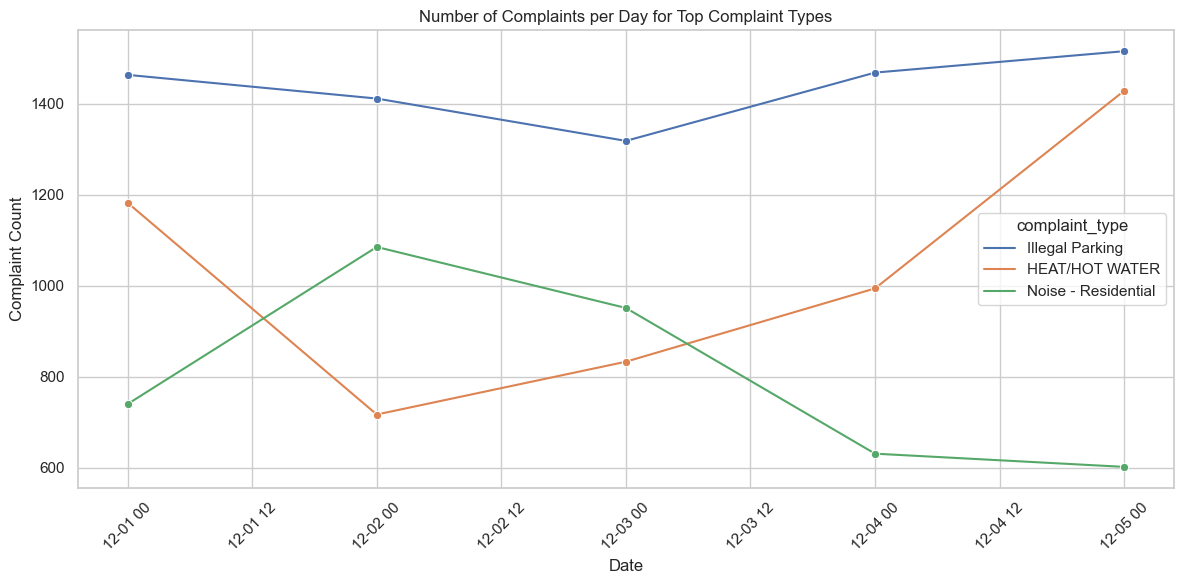

In [313]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'truncated_date' to datetime for proper plotting
top_complaint_types['truncated_date'] = pd.to_datetime(top_complaint_types['truncated_date'])

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='truncated_date', y='complaint_count', hue='complaint_type', data=top_complaint_types, marker='o')
plt.title('Number of Complaints per Day for Top Complaint Types')
plt.xlabel('Date')
plt.ylabel('Complaint Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()